In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv('classification-datasets.csv')

In [3]:
data.describe()

,height_cm,weight_kg
count,18278.000000,18278.000000
mean,181.362184,75.276343
std,6.756961,7.047744
min,156.000000,50.000000
25%,177.000000,70.000000
50%,181.000000,75.000000
75%,186.000000,80.000000
max,205.000000,110.000000


In [4]:
data

,height_cm,weight_kg,body_type
0,170,72,Normal
1,187,83,Normal
2,175,68,Lean
3,188,87,Normal
4,175,74,Normal
...,...,...,...
18273,186,79,Normal
18274,177,66,Normal
18275,186,75,Lean
18276,185,74,Lean


Cek apakah ada missing value pada data

In [5]:
missing_values = data.isnull().sum()
missing_values

height_cm    0
weight_kg    0
body_type    0
dtype: int64

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib as mpl

(array([0.5, 1.5]), <a list of 2 Text yticklabel objects>)

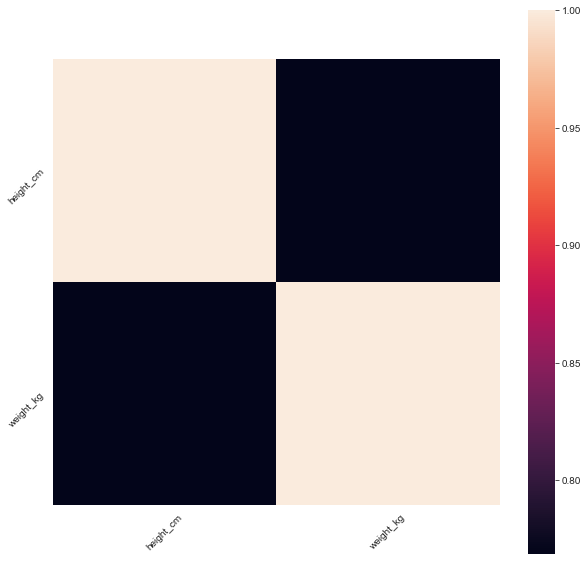

In [7]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

<Figure size 6000x6000 with 0 Axes>

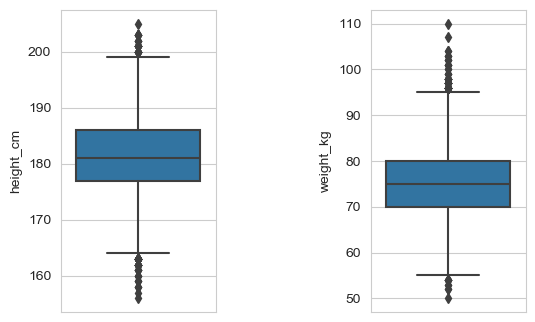

In [8]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["height_cm"], ax=axes[0])
sns.boxplot(y=data["weight_kg"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [32]:
def setbound(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    print(Q1, Q3)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range


lowerbound,upperbound = setbound(data["height_cm"])
resHeight = data[(data["height_cm"] < lowerbound) | (data["height_cm"] > upperbound)]
print(data[(data["height_cm"] < lowerbound) | (data["height_cm"] > upperbound)])

lowerbound,upperbound = setbound(data["weight_kg"])
print(data[(data["weight_kg"] < lowerbound) | (data["weight_kg"] > upperbound)])
resWeight = data[(data["weight_kg"] < lowerbound) | (data["weight_kg"] > upperbound)]
res = pd.concat([resHeight,resWeight]).drop_duplicates()
res = res.index

print('jumlah outliers= ',len(res))
print('para outliers')
print(res)
data.drop(res, inplace=True)

177.0 186.0
       height_cm  weight_kg body_type
54           163         59    Normal
355          163         70    Stocky
393          163         61    Normal
628          200         76      Lean
776          163         65    Normal
...          ...        ...       ...
17365        203         80      Lean
17444        200        100    Normal
17587        162         60      Lean
18034        202         87      Lean
18103        163         60      Lean

[89 rows x 3 columns]
70.0 80.0
       height_cm  weight_kg body_type
28           199         96    Stocky
77           195         97    Stocky
165          195         97    Stocky
280          194        100    Stocky
440          190         96    Normal
...          ...        ...       ...
17158        188         98    Stocky
17444        200        100    Normal
17612        170         54      Lean
17772        192         96    Stocky
17817        167         54      Lean

[73 rows x 3 columns]
jumlah outliers=  12

In [33]:
data

,height_cm,weight_kg,body_type
0,170,72,Normal
1,187,83,Normal
2,175,68,Lean
3,188,87,Normal
4,175,74,Normal
...,...,...,...
18273,186,79,Normal
18274,177,66,Normal
18275,186,75,Lean
18276,185,74,Lean


<Figure size 6000x6000 with 0 Axes>

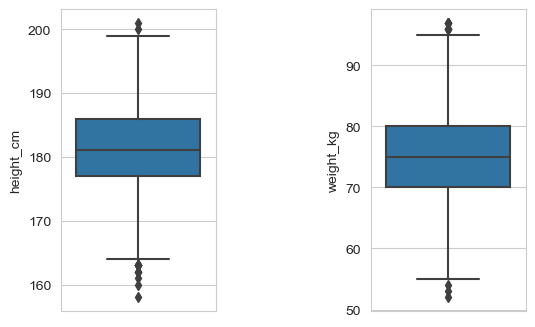

In [35]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data["height_cm"], ax=axes[0])
sns.boxplot(y=data["weight_kg"], ax=axes[1])
plt.subplots_adjust(wspace=1)

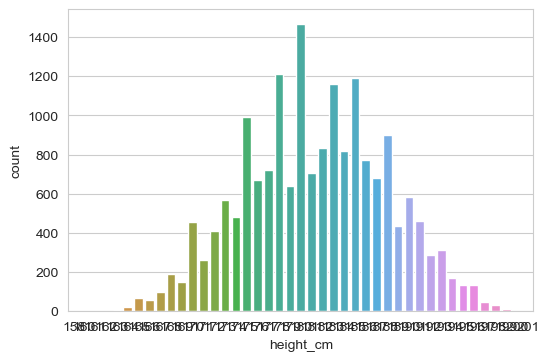

In [36]:
sns.countplot(x = 'height_cm', data = data)

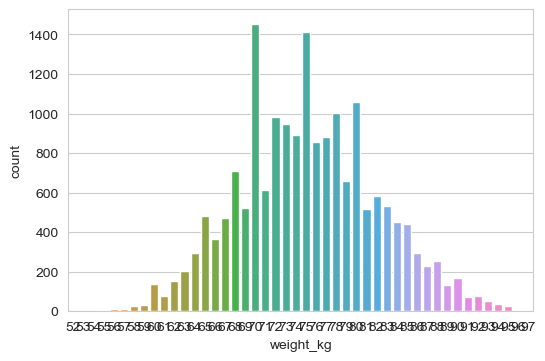

In [37]:
sns.countplot(x = 'weight_kg', data = data)

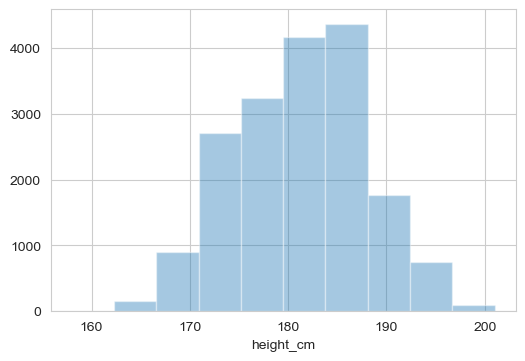

In [38]:
sns.distplot(data[data['height_cm'].notnull()]['height_cm'], kde=False, bins=10);

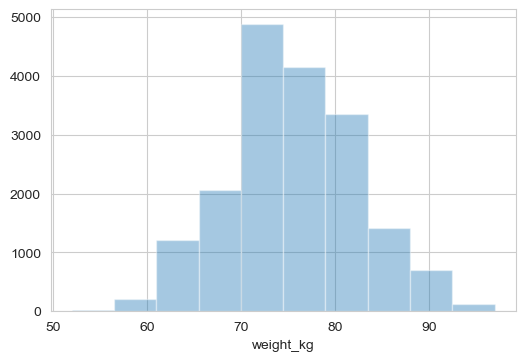

In [39]:
sns.distplot(data[data['weight_kg'].notnull()]['weight_kg'], kde=False, bins=10);

<Figure size 15000x15000 with 0 Axes>

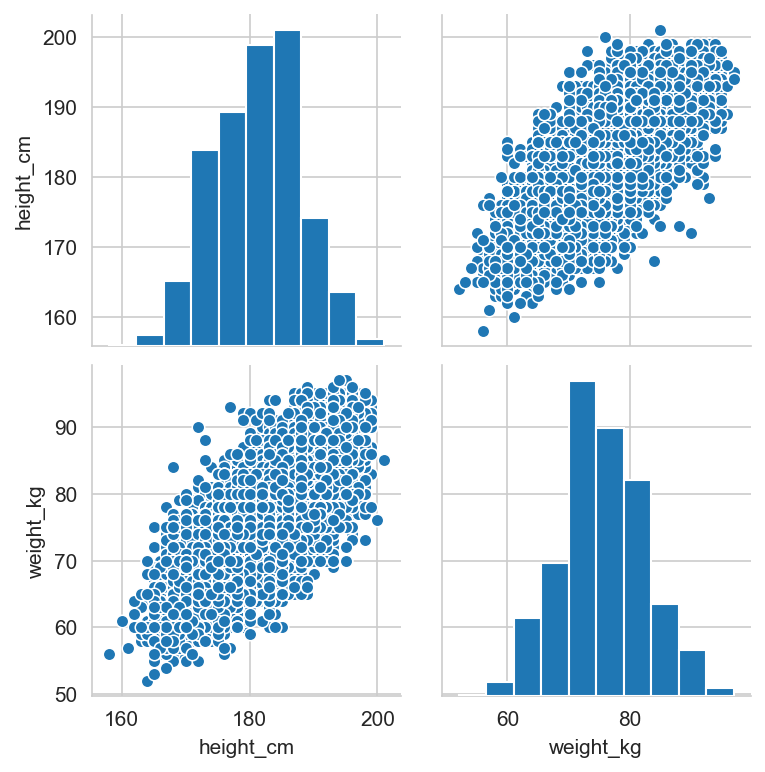

In [40]:
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(100, 100))
df_nona= data[data['weight_kg'].notnull()]
g = sns.pairplot(df_nona[['height_cm', 'weight_kg']] )

In [41]:
pd.crosstab(data['height_cm'], data['weight_kg'], margins=True)

weight_kg,52,53,54,55,56,57,58,59,60,61,...,89,90,91,92,93,94,95,96,97,All
height_cm,,,,,,,,,,,,,,,,,,,,,
158,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
160,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
161,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
162,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
163,0,0,0,0,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,7
164,1,0,0,0,0,0,1,1,5,2,...,0,0,0,0,0,0,0,0,0,20
165,0,1,0,2,1,0,2,0,10,4,...,0,0,0,0,0,0,0,0,0,66
166,0,0,0,0,2,2,1,3,7,6,...,0,0,0,0,0,0,0,0,0,60
167,0,0,1,0,3,2,5,3,14,4,...,0,0,0,0,0,0,0,0,0,101


In [42]:
pd.crosstab(data['weight_kg'], data['height_cm'], margins=True)

height_cm,158,160,161,162,163,164,165,166,167,168,...,193,194,195,196,197,198,199,200,201,All
weight_kg,,,,,,,,,,,,,,,,,,,,,
52,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
55,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,5
56,1,0,0,0,0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,11
57,0,0,1,0,0,0,0,2,2,1,...,0,0,0,0,0,0,0,0,0,13
58,0,0,0,0,1,1,2,1,5,3,...,0,0,0,0,0,0,0,0,0,29
59,0,0,0,0,1,1,0,3,3,4,...,0,0,0,0,0,0,0,0,0,31
60,0,0,0,1,2,5,10,7,14,11,...,0,0,0,0,0,0,0,0,0,138


In [44]:
# data_train = np.array([data['height_cm'],data['weight_kg']])
data_train = []
data_train

[]

Mengambil Independen Data

In [45]:
for item in data.values:
#     print(item[1])
    data_train.append([item[0], item[1]])
data_train

[[170, 72],
 [187, 83],
 [175, 68],
 [188, 87],
 [175, 74],
 [181, 70],
 [187, 85],
 [193, 92],
 [172, 66],
 [175, 71],
 [178, 73],
 [187, 89],
 [188, 89],
 [191, 91],
 [192, 82],
 [168, 72],
 [187, 85],
 [173, 70],
 [184, 82],
 [182, 86],
 [184, 80],
 [189, 76],
 [176, 73],
 [177, 75],
 [191, 84],
 [188, 86],
 [170, 69],
 [181, 76],
 [194, 85],
 [193, 92],
 [193, 92],
 [188, 82],
 [173, 67],
 [185, 77],
 [187, 78],
 [183, 76],
 [180, 71],
 [187, 80],
 [175, 69],
 [189, 85],
 [173, 64],
 [185, 84],
 [183, 78],
 [179, 67],
 [183, 82],
 [185, 81],
 [189, 86],
 [169, 61],
 [191, 94],
 [186, 81],
 [170, 68],
 [174, 70],
 [185, 80],
 [183, 75],
 [183, 75],
 [187, 80],
 [165, 60],
 [182, 75],
 [195, 90],
 [176, 73],
 [176, 79],
 [181, 76],
 [184, 78],
 [178, 72],
 [180, 69],
 [190, 85],
 [172, 68],
 [182, 74],
 [186, 75],
 [185, 85],
 [175, 73],
 [189, 89],
 [196, 90],
 [180, 74],
 [191, 81],
 [191, 76],
 [191, 82],
 [184, 77],
 [188, 78],
 [178, 64],
 [185, 80],
 [186, 81],
 [179, 69],
 [18

In [46]:
train = np.array(data_train)
len(train)

18151

Mengambil Dependen Data

In [47]:
label = np.array(data['body_type'])
len(label)

18151

### Split the Dataset

In [48]:
#split dataset 80% dan 20% secara random tiap 777 data
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 100)

## Naive Bayes

In [49]:
from sklearn.naive_bayes import CategoricalNB

In [50]:
classifier = CategoricalNB()
classifier.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
hasil = classifier.predict(x_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

        Lean       0.51      0.32      0.40      1323
      Normal       0.62      0.82      0.70      2108
      Stocky       0.00      0.00      0.00       200

    accuracy                           0.59      3631
   macro avg       0.38      0.38      0.37      3631
weighted avg       0.54      0.59      0.55      3631



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kesimpulan
Dari data di atas, didapatkan bahwa menggunakan metode Naive Bayes mendapatkan akurasi mencapai 59%

## SVM

In [53]:
from sklearn import svm

In [54]:
classifier2 = svm.SVC(decision_function_shape='ovo')
classifier2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
hasil2 = classifier2.predict(x_test)

In [56]:
print(classification_report(y_test, hasil2))

              precision    recall  f1-score   support

        Lean       0.64      0.28      0.39      1323
      Normal       0.63      0.91      0.74      2108
      Stocky       0.00      0.00      0.00       200

    accuracy                           0.63      3631
   macro avg       0.42      0.40      0.38      3631
weighted avg       0.60      0.63      0.57      3631



C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Kesimpulan
Dari data di atas, didapatkan bahwa menggunakan metode SVM mendapatkan akurasi mencapai 63%